In [170]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [171]:
def imshow(title = "Image", image = None, size = 20):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [181]:
image =cv2.imread(r'C:\Users\aquacorp\Desktop\Imagenes\Maohu\IA\rgbf\validas/20250111215413.jpg')
#image =cv2.imread(r'C:\Users\aquacorp\Desktop\circulo.png')
kernel = np.ones((5,5), np.uint8)

In [182]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blured = cv2.blur(gray, (4,5), 0)
edged = cv2.Canny(gray, 50, 170)
dilation = cv2.dilate(edged, kernel=kernel, iterations=3)
#imshow('Canny Edges', edged)

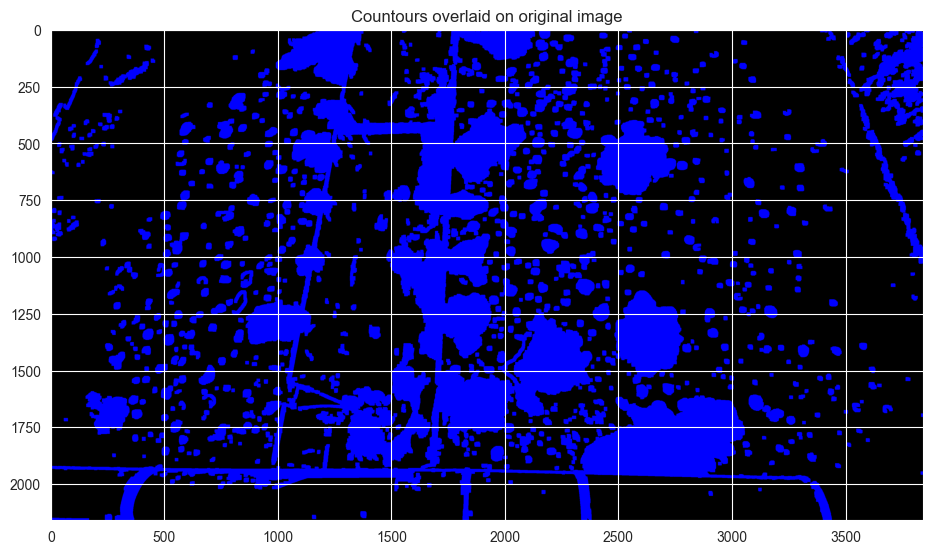

In [183]:
#contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#filtered_contours = []
#for i, h in enumerate(hierarchy[0]):
    # Si el contorno no tiene un "padre" (jerarquía de contornos exteriores)
#    if h[3] != -1:
#        filtered_contours.append(contours[i])
        
#output_image = np.zeros_like(image)  # Crear una imagen en negro
#cv2.drawContours(output_image, filtered_contours, -1, (255, 255, 255), 2)
output_image = np.zeros_like(image)
cv2.drawContours(output_image, contours, -1, (255), thickness=cv2.FILLED)
imshow('Countours overlaid on original image', output_image)

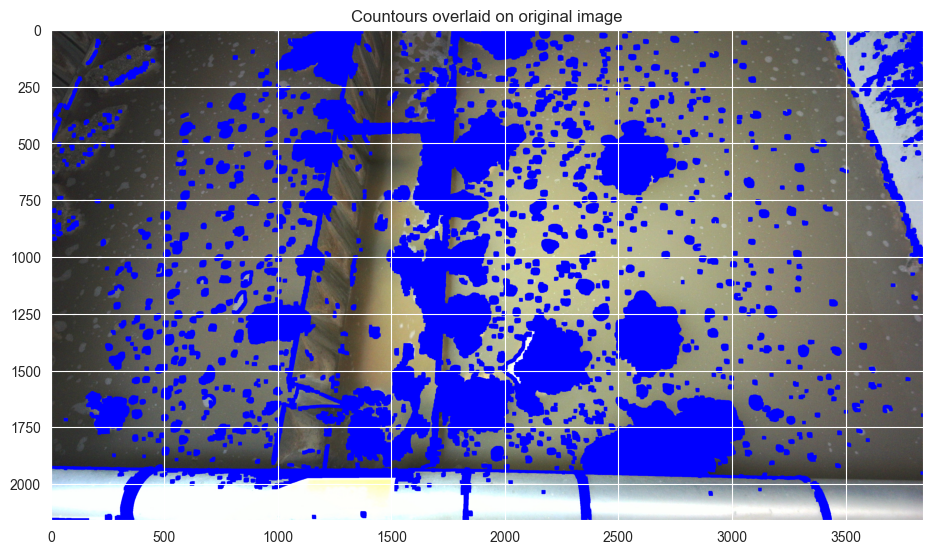

In [185]:
cv2.drawContours(image, contours, -1, (255), thickness=cv2.FILLED)
imshow('Countours overlaid on original image', image)